In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Goal of the Notebook


The goal of the notebook is to do explore data analysis with using simple visualizations on Hollywood Dataset, and get insight from it.


**About Dataset**
8 features for movie dataset released during 2007-2012, each are:
1. Film: Name of Flim
2. Genre: Movie Genre
3. Lead_Studio: Main Studio that Produced the Movie
4. Audience_score%: How Much the Audience Like it
5. Profitability: How much Money they Made
6. RottenTomatoes%: Movie rating on Rotten Tomatoes
7. Worldwide_Gross: Number of Money the Film made Worldwide
8. Year: Year the Film was Made

**Import neseccary labrary**

In [2]:
# for dataframe
import pandas as pd 
import numpy as np

# for visualization
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt  #create box
import seaborn as sns  #visualize
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# read data
df1 = pd.read_csv("../input/hollywood-most-profitable-stories/HollywoodsMostProfitableStories.csv")
hollywood = df1.rename(columns=lambda x: x.replace(" ","_"))

print("shape of dataframe:", hollywood.shape)
hollywood.head(5)

shape of dataframe: (74, 8)


,Film,Genre,Lead_Studio,Audience__score_%,Profitability,Rotten_Tomatoes_%,Worldwide_Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


let's do some data explorations


Missing Values
* Let's remember, which columns have the missing values

In [4]:
hollywood.isnull().sum()

Film                 0
Genre                0
Lead_Studio          1
Audience__score_%    1
Profitability        3
Rotten_Tomatoes_%    1
Worldwide_Gross      0
Year                 0
dtype: int64

Since we will use all the films, film column must be without missing values. So we are OK for the film column.
Genre, Worldwide Gross and Year columns do not have any missing values.


In [5]:
hollywood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               74 non-null     object 
 1   Genre              74 non-null     object 
 2   Lead_Studio        73 non-null     object 
 3   Audience__score_%  73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten_Tomatoes_%  73 non-null     float64
 6   Worldwide_Gross    74 non-null     float64
 7   Year               74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


let's check more of the missing value


In [6]:
hollywood[hollywood['Lead_Studio'].isnull()]

,Film,Genre,Lead_Studio,Audience__score_%,Profitability,Rotten_Tomatoes_%,Worldwide_Gross,Year
38,No Reservations,Comedy,NaN,64.0,3.30718,39.0,92.60105,2007


In [7]:
hollywood[hollywood['Audience__score_%'].isnull()]

,Film,Genre,Lead_Studio,Audience__score_%,Profitability,Rotten_Tomatoes_%,Worldwide_Gross,Year
50,Something Borrowed,Romance,Independent,NaN,1.719514,NaN,60.183,2011


In [8]:
hollywood[hollywood['Profitability'].isnull()]

,Film,Genre,Lead_Studio,Audience__score_%,Profitability,Rotten_Tomatoes_%,Worldwide_Gross,Year
18,Jane Eyre,Romance,Universal,77.0,NaN,85.0,30.147,2011
41,Our Family Wedding,Comedy,Independent,49.0,NaN,14.0,21.370,2010
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040,2010


In [9]:
hollywood[hollywood['Profitability'].isnull()]

,Film,Genre,Lead_Studio,Audience__score_%,Profitability,Rotten_Tomatoes_%,Worldwide_Gross,Year
18,Jane Eyre,Romance,Universal,77.0,NaN,85.0,30.147,2011
41,Our Family Wedding,Comedy,Independent,49.0,NaN,14.0,21.370,2010
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040,2010


In [10]:
hollywood[hollywood['Rotten_Tomatoes_%'].isnull()]

,Film,Genre,Lead_Studio,Audience__score_%,Profitability,Rotten_Tomatoes_%,Worldwide_Gross,Year
50,Something Borrowed,Romance,Independent,NaN,1.719514,NaN,60.183,2011


In [11]:
hollywood['Genre'].value_counts(normalize = True)

Comedy       0.554054
Romance      0.202703
Drama        0.175676
Animation    0.040541
Action       0.013514
Fantasy      0.013514
Name: Genre, dtype: float64

* comedy makes 55%
* Romance 20% and Drama 17,5% than others  Genres


In [12]:
hollywood['Lead_Studio'].value_counts(normalize = True)

Independent              0.260274
Warner Bros.             0.164384
Universal                0.095890
Disney                   0.095890
Fox                      0.082192
Summit                   0.068493
Sony                     0.054795
Paramount                0.054795
The Weinstein Company    0.041096
Lionsgate                0.027397
20th Century Fox         0.027397
New Line                 0.013699
CBS                      0.013699
Name: Lead_Studio, dtype: float64

* Independent studios make 26% of the all the studios in this dataset.
* Warner Bros also comes close by 16%
* Universal and Disney share the same 9,5%


In [13]:
#let's check the statistic value of each column
hollywood.describe()

,Audience__score_%,Profitability,Rotten_Tomatoes_%,Worldwide_Gross,Year
count,73.000000,71.000000,73.000000,74.000000,74.000000
mean,64.136986,4.741610,47.356164,136.351979,2009.054054
std,13.647665,8.292017,26.242655,157.067561,1.353756
min,35.000000,0.005000,3.000000,0.025000,2007.000000
25%,52.000000,1.790680,27.000000,32.447500,2008.000000
50%,64.000000,2.642353,45.000000,73.198612,2009.000000
75%,76.000000,4.850958,65.000000,190.185250,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


As we can know that the dataframe consists of 3 categorical columns: "Film", "Genre", "Lead_Studio", and 5 numeric columns.

**We'll start by exploring categorical columns.**

In [16]:
def plotly_bar(series, title, x_title, y_title):
    fig = px.bar(x = series.index, 
                 y = series.values, 
                 color = series.index, 
                 color_discrete_sequence = px.colors.qualitative.Antique,
                 text = series.values,
                 template = "ggplot2",
               title = title)

    fig.update_layout(
    font=dict(size=17,family="Times New Roman"))

    fig.update_layout(
    xaxis_title=x_title,
    yaxis_title=y_title,
    font=dict(size=17,family="Times New Roman"))
    
    return fig

In [17]:
dg_genre = hollywood.Genre.value_counts()
plotly_bar(dg_genre, "1. Genre", 'Genre', 'count')

> Genre mostly consists of "Comedy", next is "Romance" and "Drama"

In [18]:
df_LS = hollywood.groupby('Lead_Studio').size().sort_values(ascending=False)
plotly_bar(df_LS, '2. Lead Studio', 'Studio Name', 'count')

* Independent studios make number 1 of the list.
* Warner Bros also comes close by 2
* Universal and Disney share the same vakue

Text(0.5, 1.0, '3. Year Distribution')

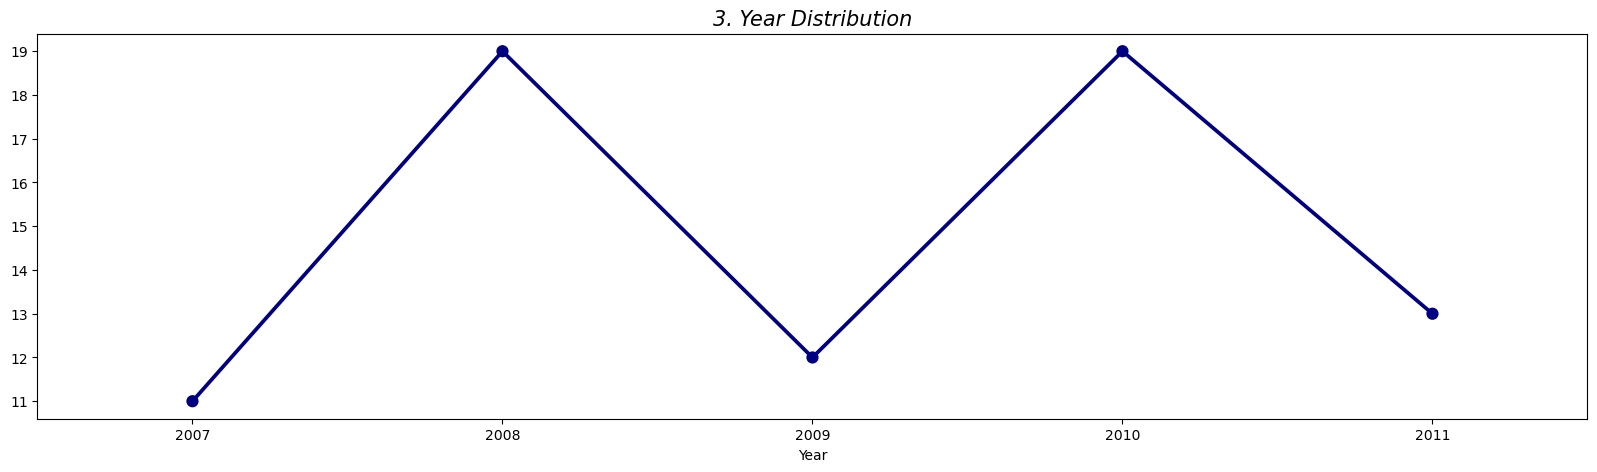

In [23]:
#Year column as numeric
year = hollywood.groupby('Year').size()
plt.figure(figsize=(20,5))
sns.pointplot(x = hollywood.groupby('Year').size().index.astype(str), 
              y = hollywood.groupby('Year').size().values,
              color = 'navy').set_title('3. Year Distribution',fontsize=15, fontstyle = 'italic')

checking the outliers of the numeric columns

<Axes: title={'center': 'Hollywood Movies Numbers'}>

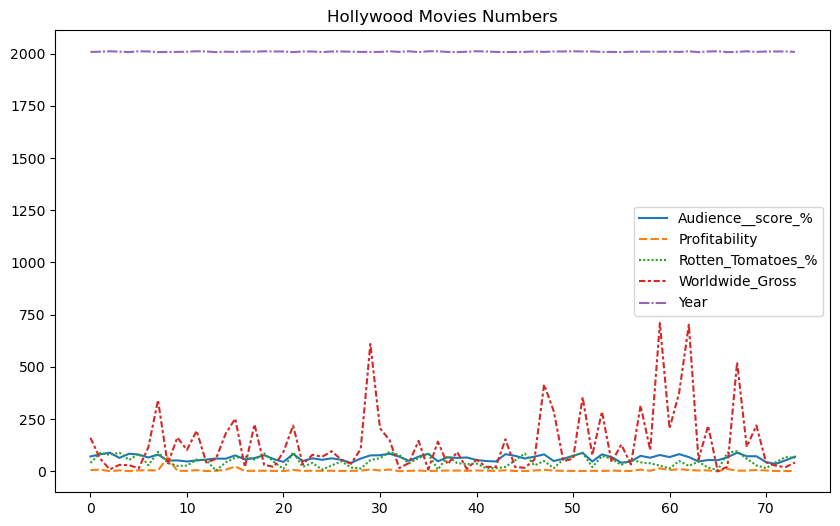

In [48]:
# Set the width and height of the figure
plt.figure(figsize=(10, 6))

# Add title
plt.title("Hollywood Movies Numbers")

# Line chart showing daily global streams of each song 
sns.lineplot(data=hollywood)

In [29]:
genre = hollywood.groupby('Genre').mean().Profitability.sort_values(ascending = False)
genre = np.round(genre,2)
plotly_bar(genre, "Genre by Mean Profitability", 'Genre', 'Mean Profitability')


/tmp/ipykernel_32/3658190987.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [30]:
Lead_Studio = hollywood.groupby('Lead_Studio').mean().Worldwide_Gross.sort_values(ascending=False)
Lead_Studio = np.round(Lead_Studio,1)
plotly_bar(Lead_Studio, "Lead Studio by Mean Worldwide Gross", 'Lead Studios', 'Mean Worldwide Gross')

/tmp/ipykernel_32/2619842407.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='Rotten_Tomatoes_%', ylabel='Worldwide_Gross'>

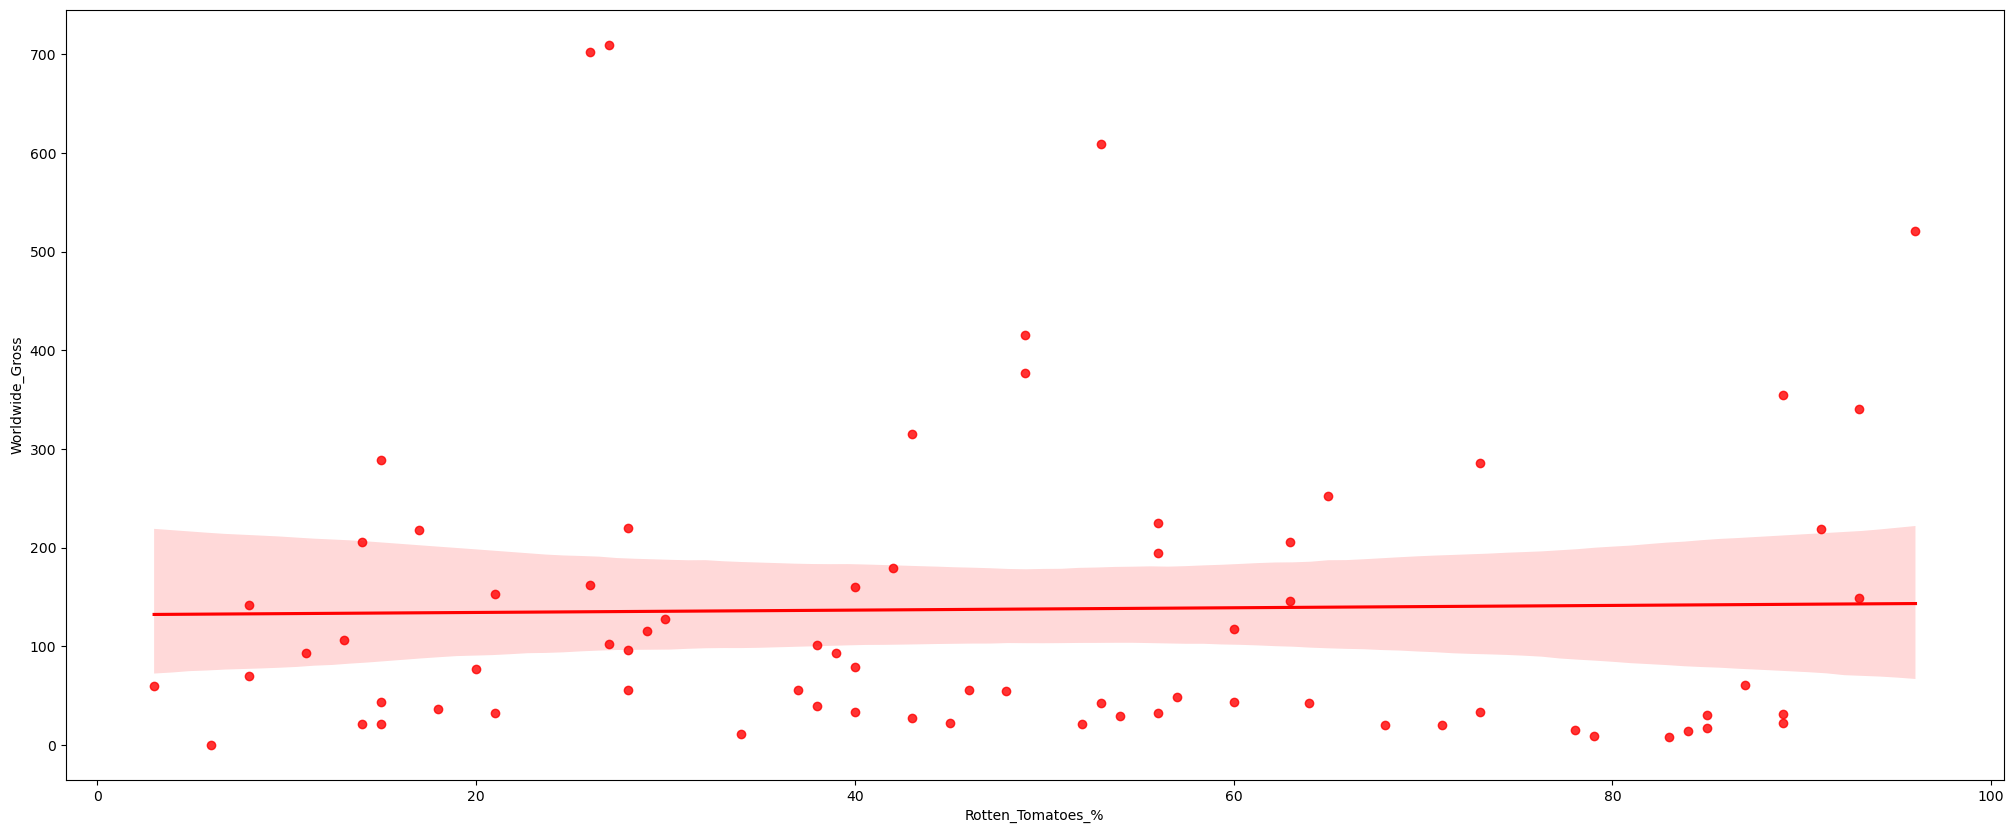

In [31]:
fig, ax = plt.subplots() 
fig.set_size_inches(25,10)
sns.regplot(x='Rotten_Tomatoes_%',y='Worldwide_Gross',data=hollywood, color='red')

<Axes: xlabel='Audience__score_%', ylabel='Rotten_Tomatoes_%'>

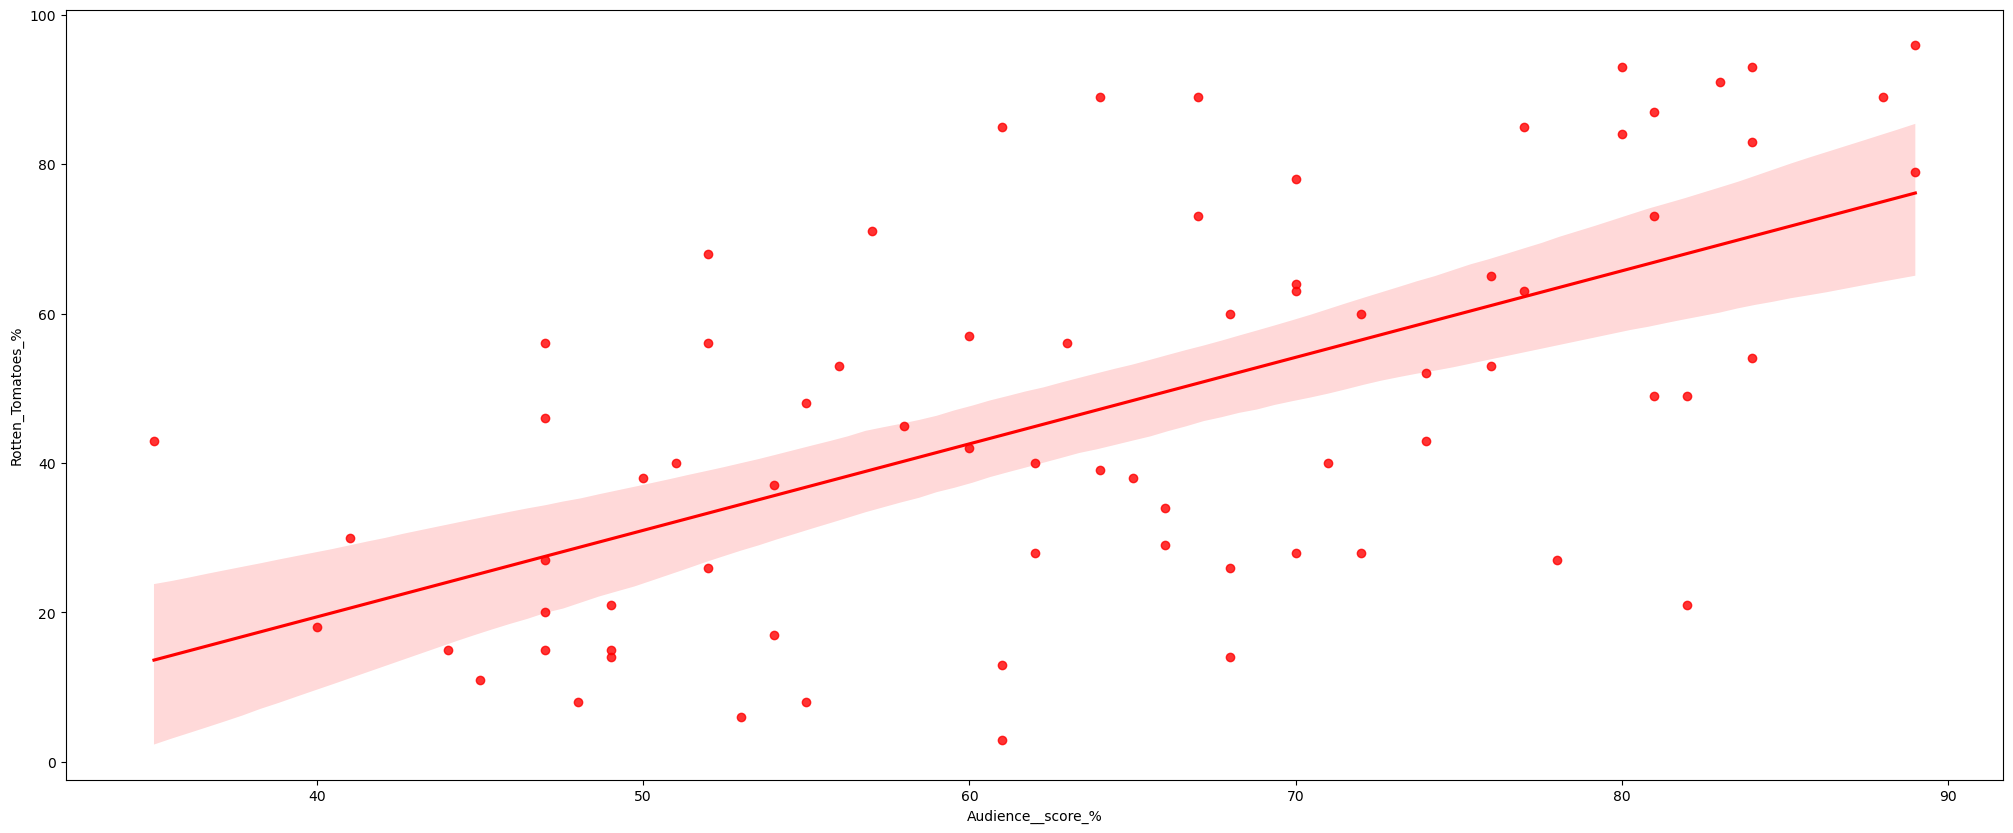

In [36]:
fig, ax = plt.subplots() 
fig.set_size_inches(25,10)
sns.regplot(x='Audience__score_%',y='Rotten_Tomatoes_%',data=hollywood, color='red')

<Axes: xlabel='Audience__score_%', ylabel='Worldwide_Gross'>

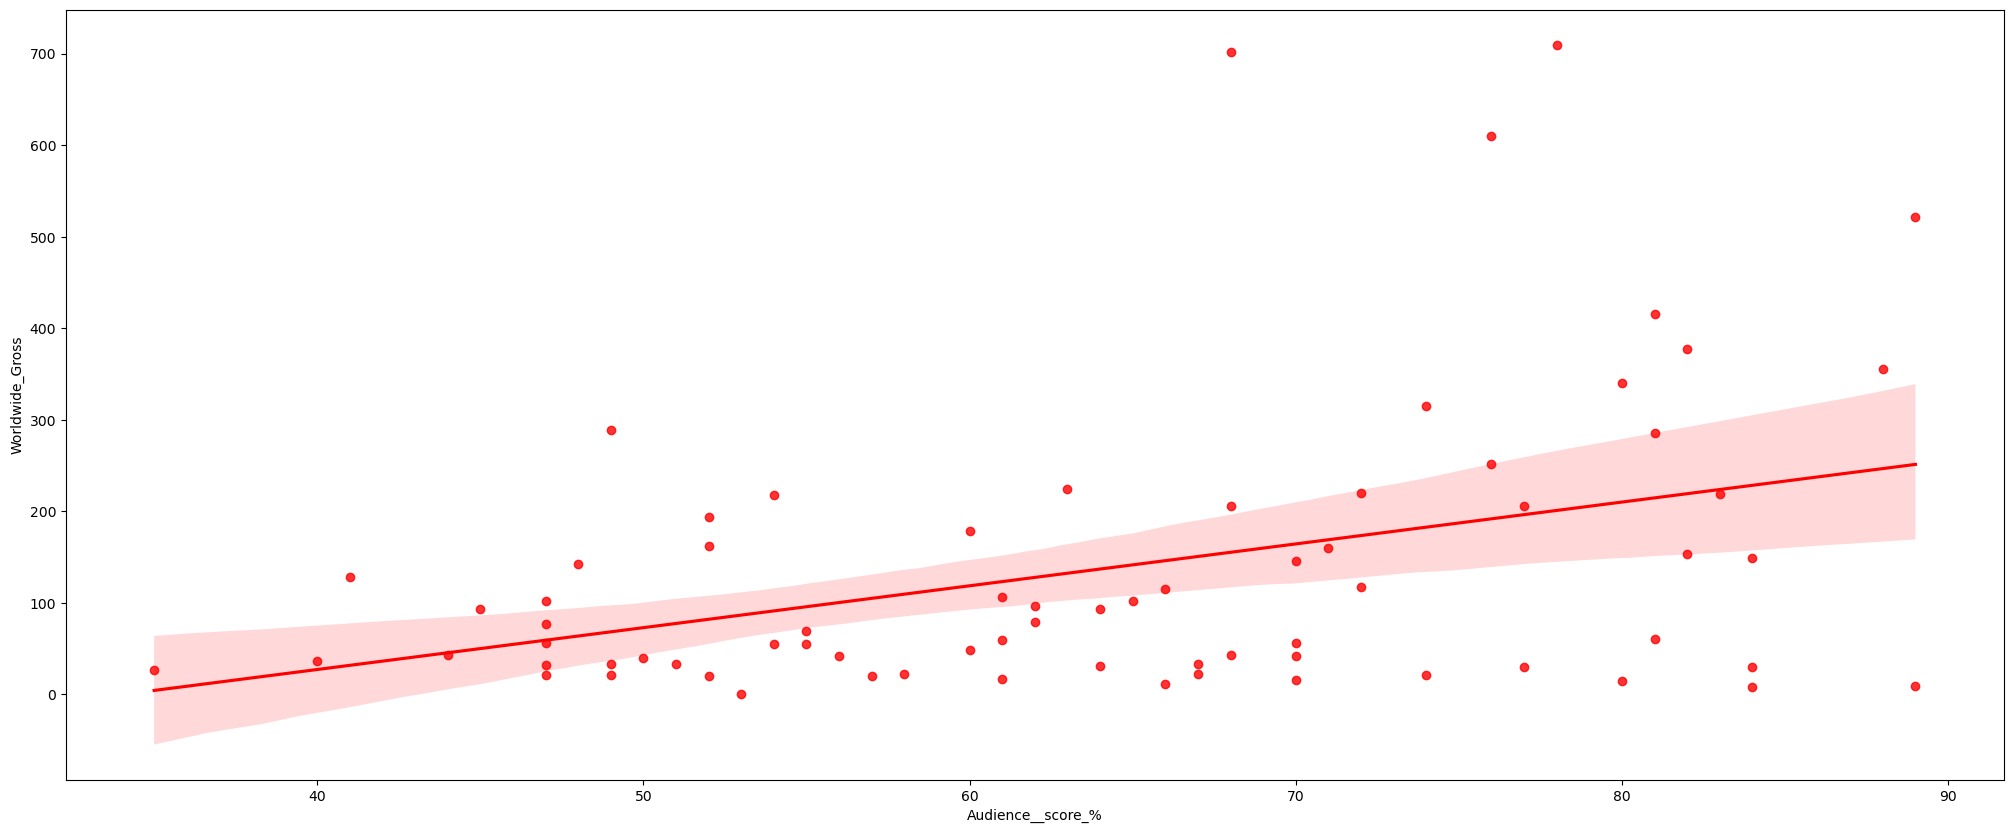

In [32]:
fig, ax = plt.subplots() 
fig.set_size_inches(25,10)
sns.regplot(x='Audience__score_%',y='Worldwide_Gross',data=hollywood, color='red')

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Which Genre Makes the Most Money?")

# Bar chart showing which genre made the most money
sns.barplot(x=hollywood.Profitability, y=hollywood['Genre'])

# Add label for vertical axis
plt.ylabel("Movie Genres")

<Axes: xlabel='Worldwide_Gross', ylabel='Profitability'>

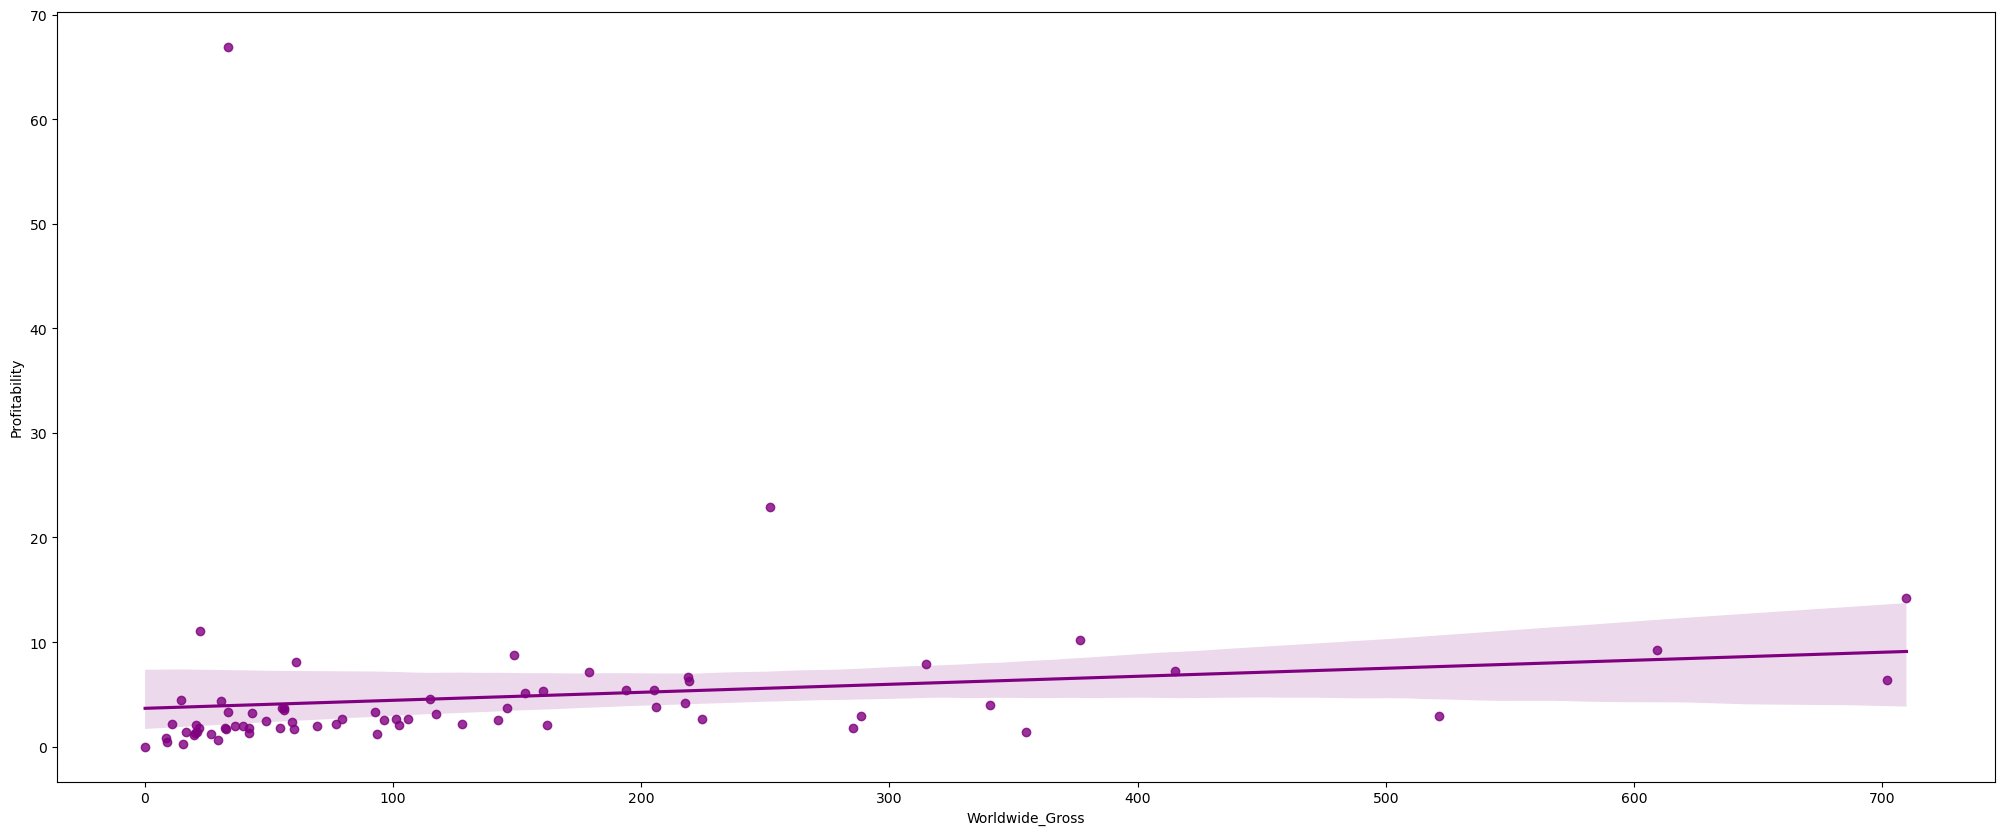

In [33]:
fig, ax = plt.subplots() 
fig.set_size_inches(25,10)
sns.regplot(x='Worldwide_Gross',y='Profitability',data=hollywood, color='purple')

/tmp/ipykernel_32/223686261.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

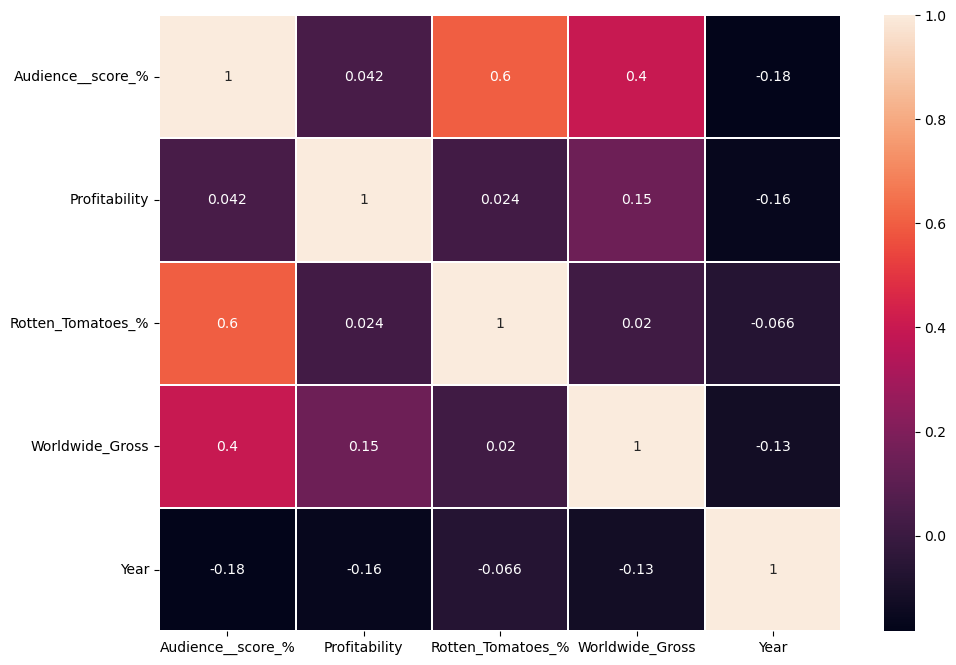

In [34]:
# fig .set_size_inches(10,10)
# sns.pointplot(x = year_worldwide_Gross.index, y=year_worldwide_Gross.Worldwide_Gross, color='c')
plt.figure(figsize=(11,8))
sns.heatmap(hollywood.corr(), annot=True, linewidths=.3)